In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Memanggil Dataset
import pandas as pd
df = pd.read_csv('audi.csv')


In [3]:
# Print 5 data atas
print(df.head(5))


  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0


In [4]:
# Melihat Info attribut
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


<Axes: >

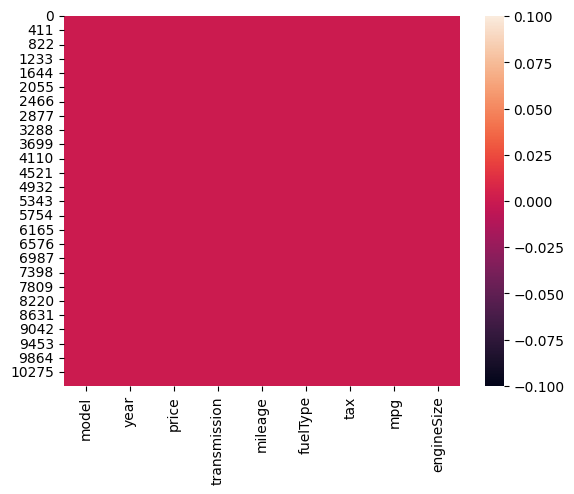

In [5]:
# Explore data analys
sns.heatmap(df.isnull())

In [6]:
# Melihat Deskripsi attribute
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


C:\Users\prase\AppData\Local\Temp\ipykernel_10412\2973517587.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

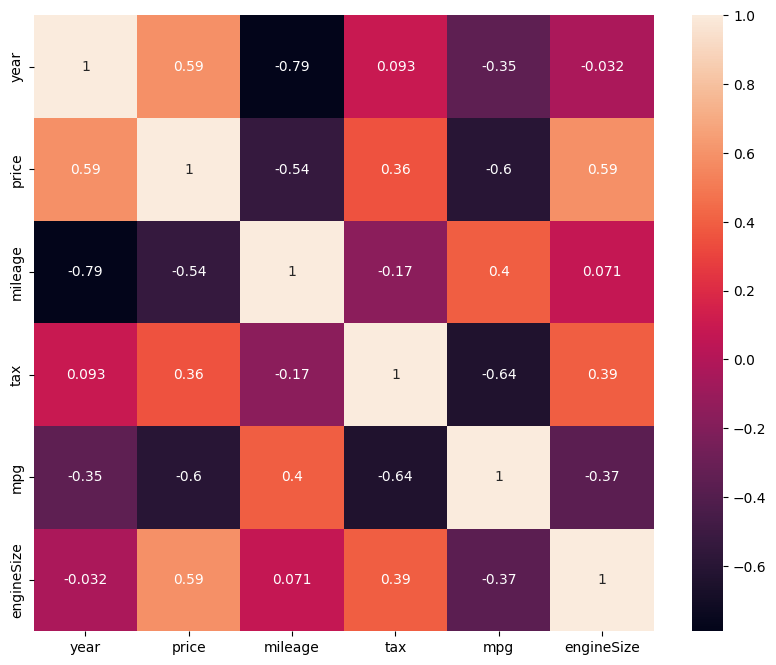

In [7]:
# membuat heatmap yang menunjukkan korelasi antara setiap pasang variabel dalam dataframe
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [8]:
#  mengelompokkan data dalam suatu DataFrame dan membuat model
models = df.groupby('model').count()[['tax']].sort_values(by='tax', ascending=True).reset_index()
models = models.rename(columns={'tax':'banyakmobil'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, ' A2'),
  Text(1, 0, ' RS7'),
  Text(2, 0, ' S5'),
  Text(3, 0, ' S8'),
  Text(4, 0, ' SQ7'),
  Text(5, 0, ' S4'),
  Text(6, 0, ' SQ5'),
  Text(7, 0, ' S3'),
  Text(8, 0, ' R8'),
  Text(9, 0, ' RS5'),
  Text(10, 0, ' RS4'),
  Text(11, 0, ' RS3'),
  Text(12, 0, ' RS6'),
  Text(13, 0, ' Q8'),
  Text(14, 0, ' A8'),
  Text(15, 0, ' A7'),
  Text(16, 0, ' TT'),
  Text(17, 0, ' Q7'),
  Text(18, 0, ' A6'),
  Text(19, 0, ' Q2'),
  Text(20, 0, ' Q5'),
  Text(21, 0, ' A5'),
  Text(22, 0, ' A1'),
  Text(23, 0, ' A4'),
  Text(24, 0, ' Q3'),
  Text(25, 0, ' A3')])

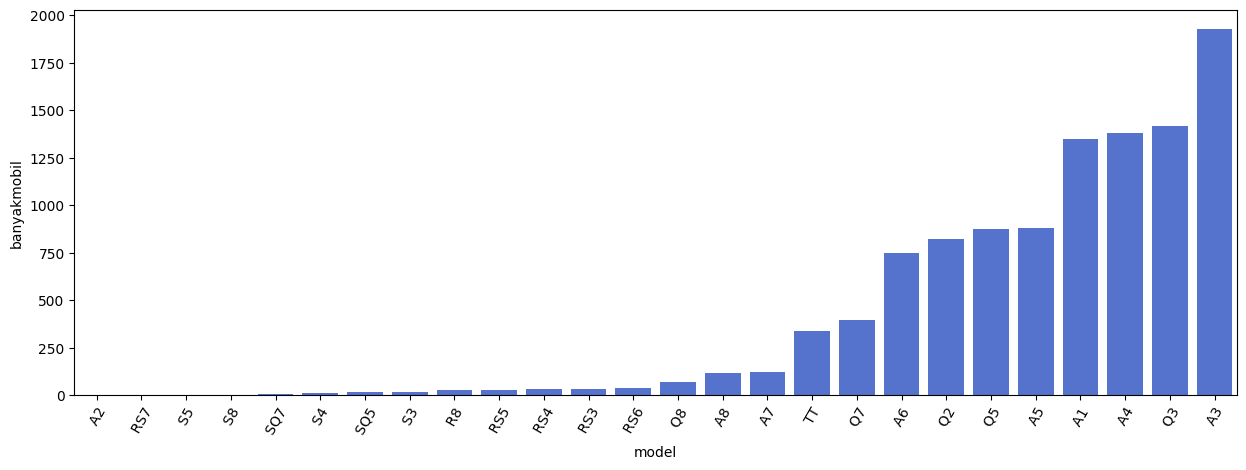

In [9]:
#  membuat bar plot dari model yang sudah dibuat
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['banyakmobil'], color='royalblue')
plt.xticks(rotation=60)

In [10]:
#  membuat bar plot dari model yang sudah dibuat

engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

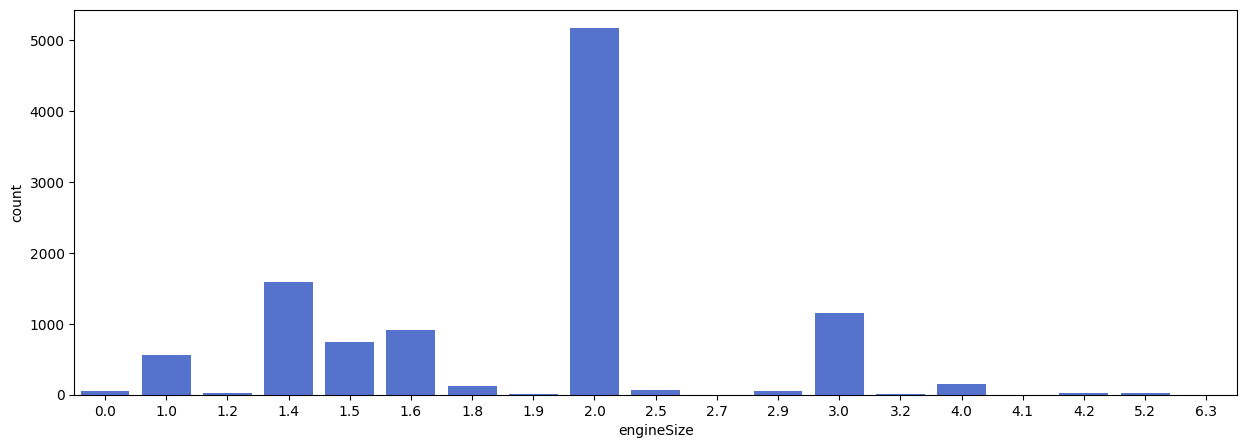

In [11]:
# #  membuat bar plot melihat engine yang sudah dibuat
plt.figure(figsize=(15,5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='royalblue')

<Figure size 1500x500 with 0 Axes>

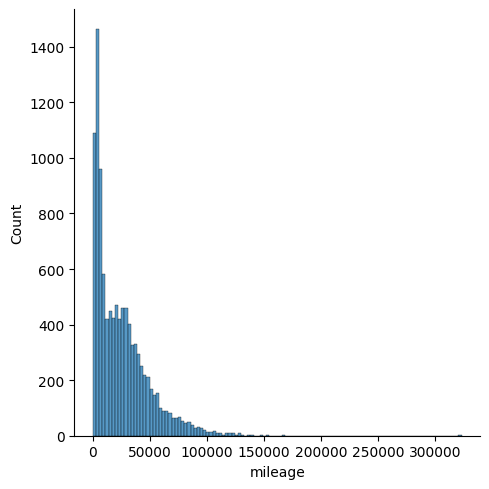

In [12]:
# Mileage 

plt.figure(figsize=(15,5))
sns.displot(df['mileage'])

<Figure size 1500x500 with 0 Axes>

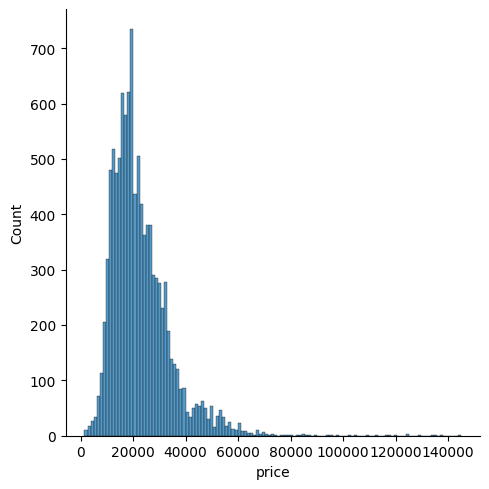

In [13]:
#Distribusi Harga Mobil

plt.figure(figsize=(15,5))
sns.displot(df['price'])

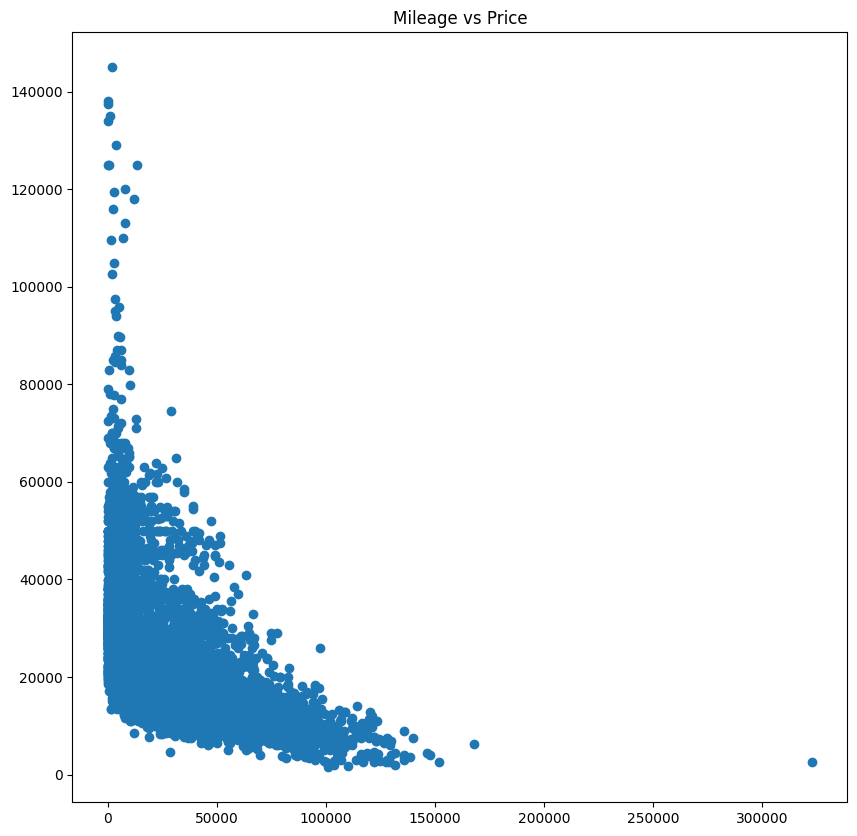

In [14]:
plt.figure(figsize = (10,10))
plt.scatter(x = df['mileage'], y = df['price'])
plt.title("Mileage vs Price")
plt.show()

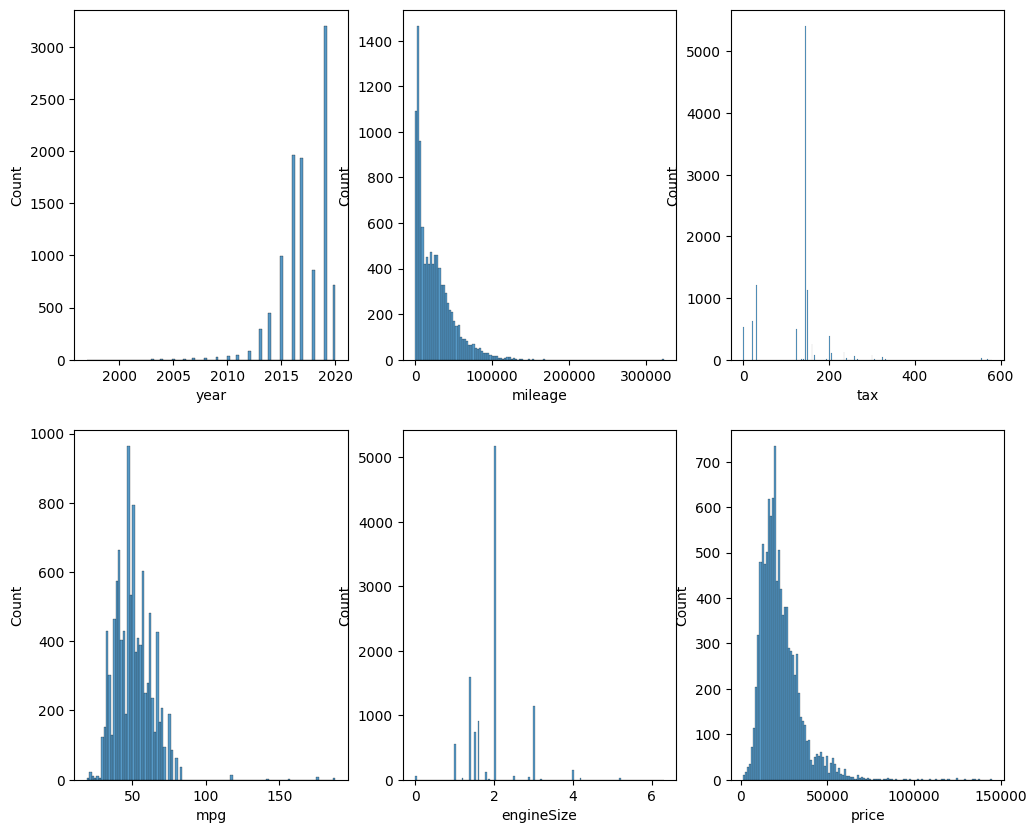

In [15]:
fig, axes = plt.subplots(figsize = (12,10), nrows = 2, ncols = 3)
sns.histplot(df["year"], ax = axes[0,0])
sns.histplot(df["mileage"], ax = axes[0,1])
sns.histplot(df["tax"], ax = axes[0,2])
sns.histplot(df["mpg"], ax = axes[1,0])
sns.histplot(df["engineSize"], ax = axes[1,1])
sns.histplot(df["price"], ax = axes[1,2])
plt.show()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64


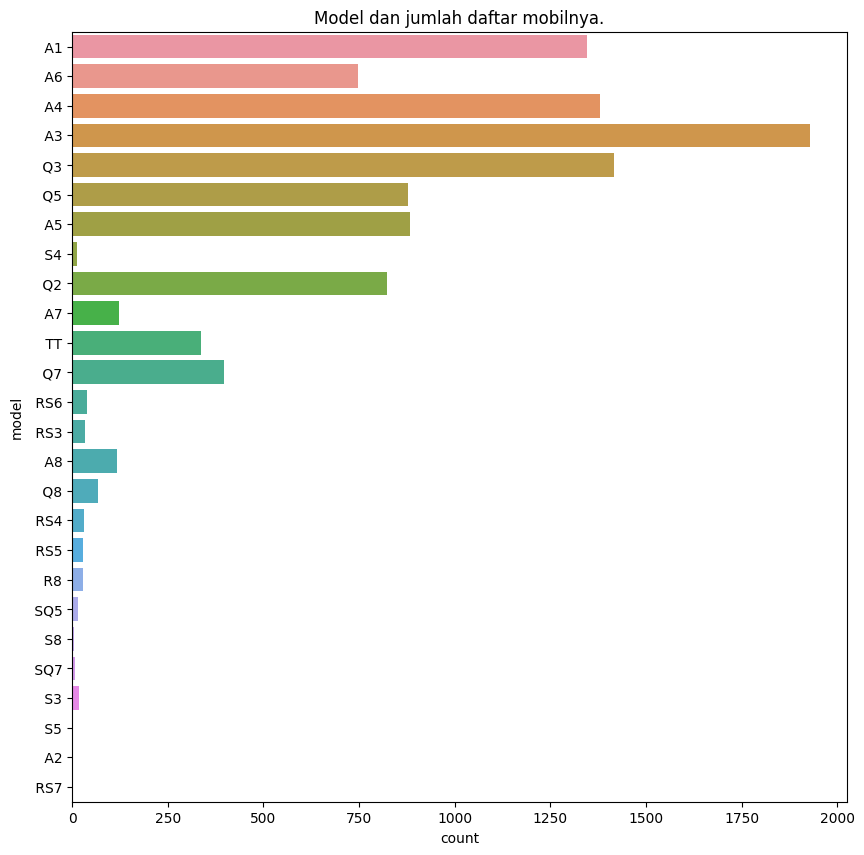

In [16]:
print(df["model"].value_counts())
plt.figure(figsize = (10,10))
sns.countplot(y = df["model"])
plt.title("Model dan jumlah daftar mobilnya.")
plt.show()

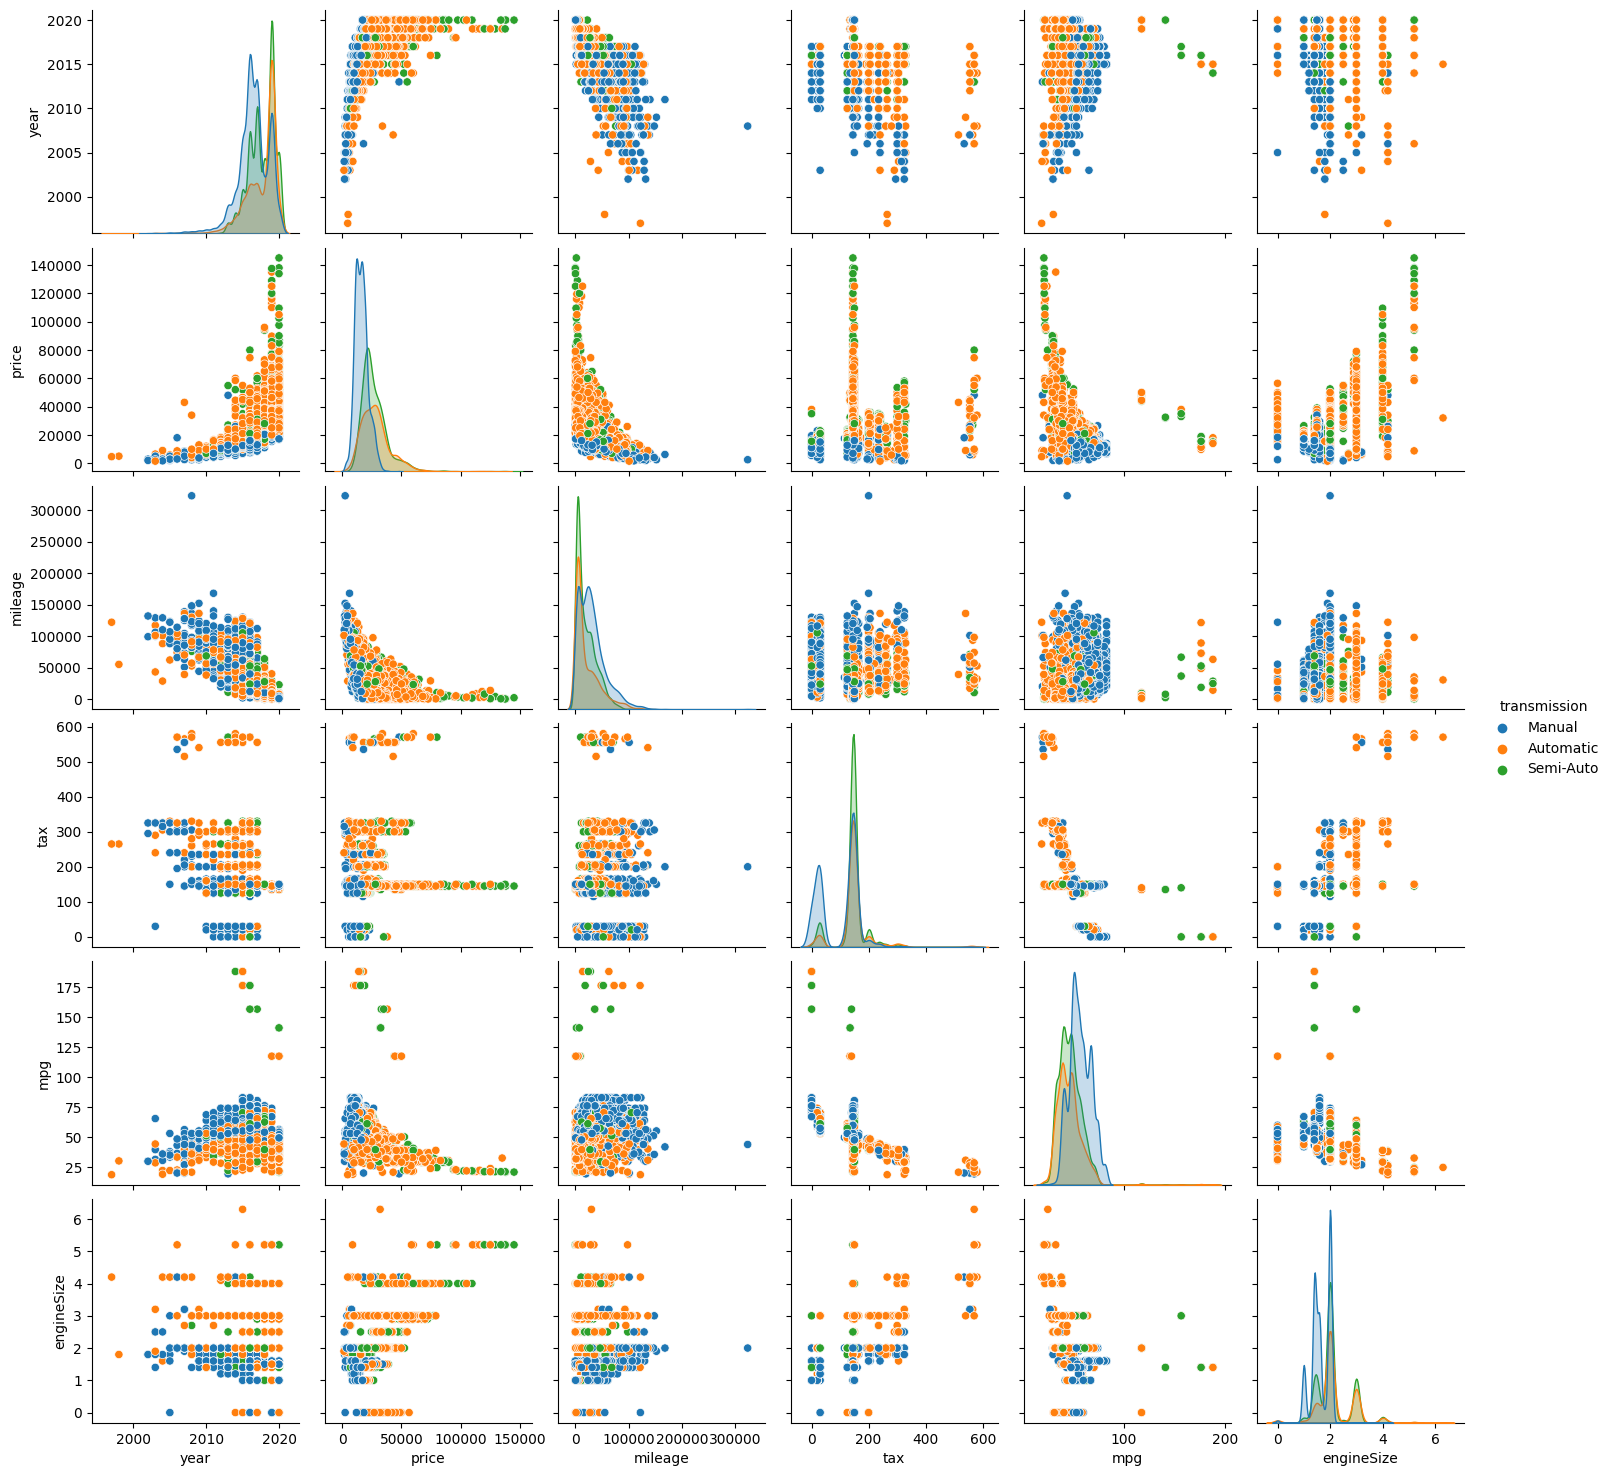

In [17]:
# membedakan setiap plot berdasarkan jenis transmisi mobil
sns.pairplot(df, diag_kind = "kde", hue = "transmission")
plt.show()

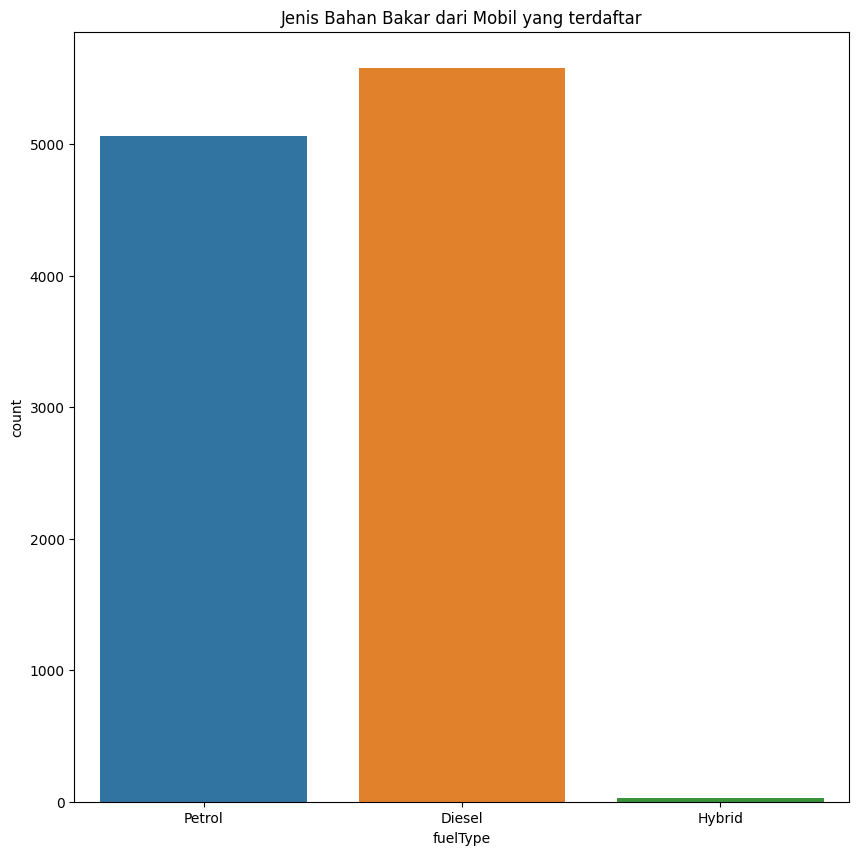

In [18]:
plt.figure(figsize = (10,10))
sns.countplot(x = "fuelType", data = df)
plt.title("Jenis Bahan Bakar dari Mobil yang terdaftar")
plt.show()

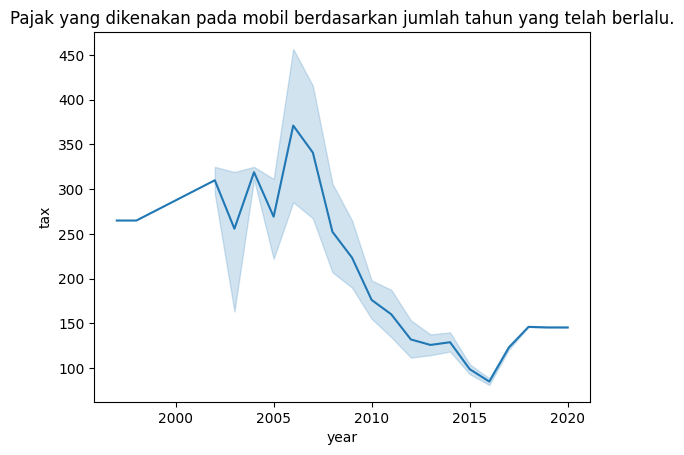

In [19]:
sns.lineplot(x = "year", y = "tax", data = df)
plt.title("Pajak yang dikenakan pada mobil berdasarkan jumlah tahun yang telah berlalu.")
plt.show()

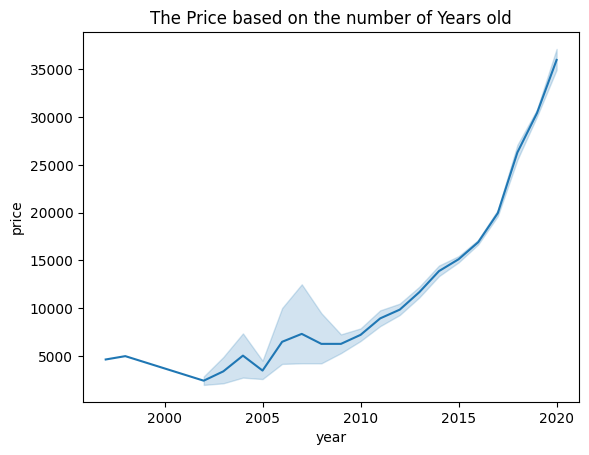

In [20]:
sns.lineplot(x = "year", y = "price", data = df)
plt.title("The Price based on the number of Years old")
plt.show()

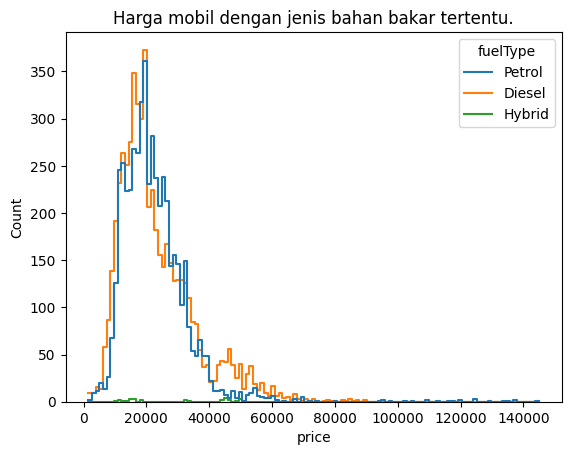

In [21]:
# Visualisasi menunjukkan bahwa harga mobil dengan jenis bahan bakar Diesel dan Petrol memiliki rentang harga yang hampir sama.
sns.histplot(data = df, x = 'price', hue = 'fuelType', fill = False, element = 'step')
plt.title("Harga mobil dengan jenis bahan bakar tertentu.")
plt.show()

Membuat Features

In [22]:
features = ['year','mileage','tax','mpg','engineSize']
x = df[features]
y = df['price']
x.shape,y.shape

((10668, 5), (10668,))

In [23]:
# Memisahkan data train dan testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(2667,)

In [24]:
# membangun model regresi linier pada data pelatihan (x_train dan y_train) dengan memanggil kelas LinearRegression()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred =lr.predict(x_test)

In [25]:
# Test score dari regresi linear
score = lr.score(x_test, y_test)
print('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.7594637694494424


In [26]:
#Predic estimasi harga mobil dalam euro

input_data = np.array([[2019,5000,145,30.2,2]])

prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR : ', prediction)

Estimasi harga mobil dalam EUR :  [33720.47965492]


c:\Users\prase\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
import pickle

fileName = 'estimasi_harga_mobil_audi.sav'
pickle.dump(lr,open(fileName,'wb'))

In [28]:

# menghitung jumlah baris dan kolom
jumlah_data = df.shape

# mencetak jumlah data
print('Jumlah data:', jumlah_data)

Jumlah data: (10668, 9)
